# DATA UNDERSTANDING

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# checking the data

In [2]:
#importring data
df = pd.read_csv("churnning.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#checking number of records in rows and columns
print(f"This data set contains {(df.shape)} rows and columns")


This data set contains (3333, 21) rows and columns


In [5]:
#checking data types 
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [6]:
#checking counts for each data type
df.dtypes.value_counts()

float64    8
int64      8
object     4
bool       1
dtype: int64

In [7]:
#checking the data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From above we can see that the dataset has 21 different columns 

The data has four different data types.

# Tidying and cleaning our data

### Data preparation


In [5]:
#checking for missing values
missing_values = df.isnull().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
#checking for duplicates
duplicated_values = df.duplicated().sum()
duplicated_values

0

This data set does not have missing value and duplicated values

# EDA

From above we realized that the data has 4 different data types and no missing or duplicate values so we can go and explore the data and check for distributions and patterns. 

In [23]:
# checking categoricals columns 
categorical_columns = df.select_dtypes(include="object")
print(categorical_columns.columns)
categorical_columns.head()

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


In [21]:
# checking numerical columns
numerical_columns = df.select_dtypes(include= "number")
print(numerical_columns.columns)
numerical_columns.head()


Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [25]:
#checking boolean 
boolean_columns = df.select_dtypes(include= "bool")
print(boolean_columns.columns)
boolean_columns.head()

Index(['churn'], dtype='object')


,churn
0,False
1,False
2,False
3,False
4,False


In [ ]:
#categorical_columns

<AxesSubplot:xlabel='international plan', ylabel='count'>

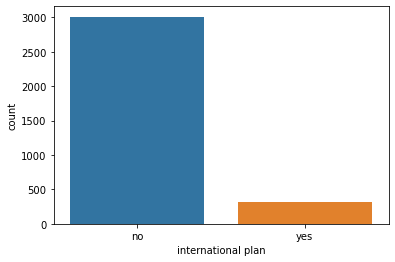

In [28]:
sns.countplot(data=df, x='international plan')

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

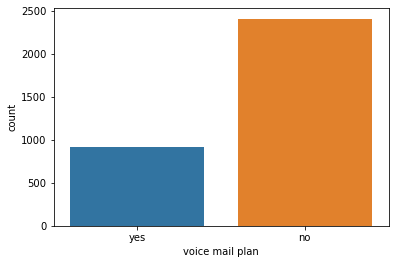

In [32]:

sns.countplot(data=df, x='voice mail plan'):
    

In [4]:
#checking more information about the numerical columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

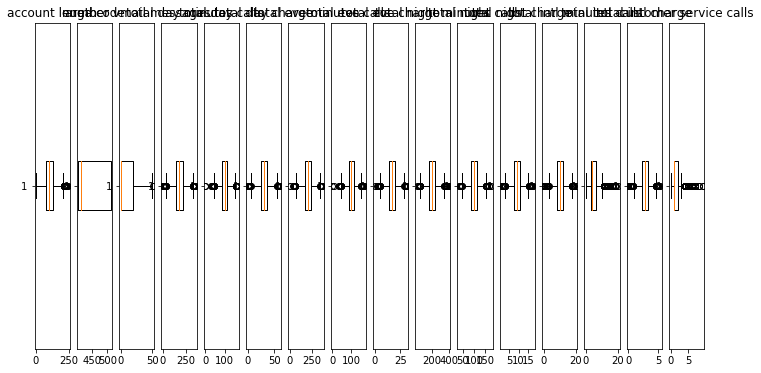

In [31]:
num_cols = ['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(col)

plt.show()


# df.boxplot(columns=[col for col in df.select_dtypes(include='int').columns])

Dealing with categorical columns

In [33]:
df['churn'] = df['churn'].replace({True: 1, False: 0}).astype(int)
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int32

In [34]:
df = df.drop(['state', 'phone number'], axis=1)


In [17]:
# One-hot-encoding Area code
df = pd.get_dummies(df, columns=['area code'], drop_first=True)



In [35]:
# Binary-encoding the other categorical columns
df['voice mail plan'] = df['voice mail plan'].replace({'yes': 1, 'no': 0})

df['international plan'] = df['international plan'].replace({'yes': 1, 'no': 0})


# Modelling

In [37]:
from sklearn.model_selection import train_test_split
X = df.drop(['churn'], axis=1)
y = df['churn']

# Perform a train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=132)



In [38]:
#importing scaler
from sklearn.preprocessing import StandardScaler
#instanciating the scaler
scaler = StandardScaler()
#
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [44]:

from sklearn.linear_model import LogisticRegression
base_model = LogisticRegression(random_state=14)

base_model.fit(X_train_scale, y_train)
y_base_pred = base_model.predict(X_test_scale)

In [45]:
base_score = base_model.score(X_test_scale, y_test)
base_score

0.8380809595202399

In [47]:
from sklearn.model_selection import cross_val_score
base_cv = cross_val_score(base_model, X_train_scale, y_train)
base_cv

array([0.85393258, 0.88180113, 0.8836773 , 0.85365854, 0.86116323])

In [50]:
from sklearn.metrics import classification_report
base_report = classification_report(y_test, y_base_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       558
           1       0.51      0.20      0.29       109

    accuracy                           0.84       667
   macro avg       0.69      0.58      0.60       667
weighted avg       0.80      0.84      0.81       667



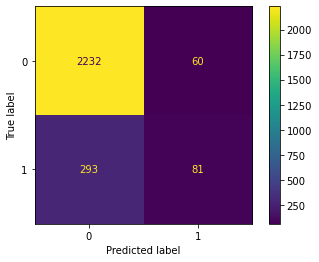

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(base_model, X_train_scale, y_train);